In [1]:
import numpy as np
import pandas as pd

import os
import re
import nltk

data = pd.read_csv('dataframe.csv')

data['total'] = data['title'] + data['text']

In [2]:
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [3]:
%%time

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


for index, row in data.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]', '', sentence)
    words = nltk.word_tokenize(sentence)

    for w in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(w)).lower()

        data.loc[index, 'total'] = filter_sentence

data = data[['total','label']]

KeyboardInterrupt: 

In [4]:
X = data['total']
Y = data['label']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer

In [6]:
#Tranforming data to value using CountVectorizer

#count_vectorizer = CountVectorizer(ngram_range=(1, 2))
#count_vectorizer.fit(x_train)
#X_freqMatrix = count_vectorizer.transform(x_train)

#Applying TFIDF to result obtained after Counvectorizer

tfidf = TfidfVectorizer(norm='l2')
x_train_featurized = tfidf.fit_transform(x_train)

In [7]:
#Applying feature extraction to test data too

#X_test_freqMatrix = count_vectorizer.transform(x_test)
x_test_featurized = tfidf.transform(x_test)

In [ ]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(x_train_featurized, y_train)
predicted = model.predict(x_test_featurized)
print( 'Accuracy of classifier on training set: {:.2f}'.format(model.score(x_train_featurized, y_train)) )
print( 'Accuracy of classifier on testing set: {:.2f}'.format(model.score(x_test_featurized, y_test)) )
cm = confusion_matrix(y_test, predicted)
cm

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

params = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
         {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV( estimator = model, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 10 )
gs = grid_search.fit(x_train_featurized, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_score_

### Logistic Regression

In [8]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

logreg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=1000000)
logreg.fit(x_train_featurized, y_train)
predicted = logreg.predict(x_test_featurized)
print( 'Accuracy of classifier on training set: {:.2f}'.format(logreg.score(x_train_featurized, y_train)) )
print( 'Accuracy of classifier on testing set: {:.2f}'.format(logreg.score(x_test_featurized, y_test)) )
confusion_matrix(y_test, predicted)

Accuracy of classifier on training set: 1.00
Accuracy of classifier on testing set: 1.00
CPU times: total: 7.41 s
Wall time: 7.8 s


array([[5640,   22],
       [  26, 5380]], dtype=int64)

C:\Users\yashj\Dropbox\PC\Desktop\project_work\env-fakenews\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


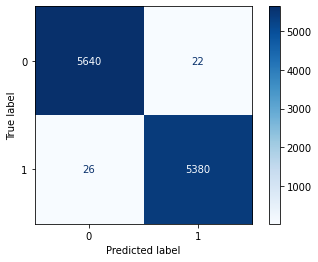

In [9]:
plot_confusion_matrix(logreg, x_test_featurized, y_test, cmap='Blues')

### MultiNomial Naive Bayes

In [10]:
%%time

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=1)
nb.fit(x_train_featurized, y_train)
predicted = nb.predict(x_test_featurized)
print( 'Accuracy of classifier on training set: {:.2f}'.format(nb.score(x_train_featurized, y_train)) )
print( 'Accuracy of classifier on testing set: {:.2f}'.format(nb.score(x_test_featurized, y_test)) )
confusion_matrix(y_test, predicted)

Accuracy of classifier on training set: 0.94
Accuracy of classifier on testing set: 0.94
CPU times: total: 93.8 ms
Wall time: 88.1 ms


array([[5403,  259],
       [ 416, 4990]], dtype=int64)

C:\Users\yashj\Dropbox\PC\Desktop\project_work\env-fakenews\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


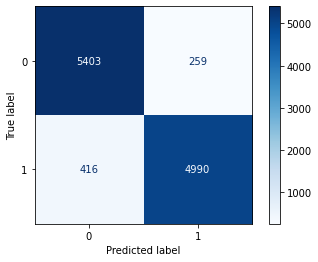

In [11]:
plot_confusion_matrix(nb, x_test_featurized, y_test, cmap='Blues')

### Random Forest

In [12]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_featurized, y_train)
predicted = rf.predict(x_test_featurized)
print( 'Accuracy of classifier on training set: {:.2f}'.format(rf.score(x_train_featurized, y_train)) )
print( 'Accuracy of classifier on testing set: {:.2f}'.format(rf.score(x_test_featurized, y_test)) )
confusion_matrix(y_test, predicted)

Accuracy of classifier on training set: 1.00
Accuracy of classifier on testing set: 0.99
CPU times: total: 51 s
Wall time: 51.1 s


array([[5625,   37],
       [  76, 5330]], dtype=int64)

C:\Users\yashj\Dropbox\PC\Desktop\project_work\env-fakenews\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


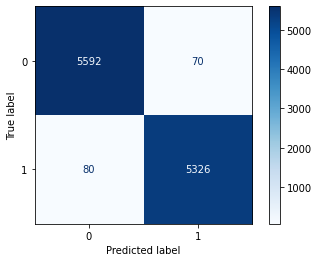

In [13]:
plot_confusion_matrix(rf, x_test_featurized, y_test, cmap='Blues')

### Pipeline

In [22]:
%%time

data = pd.read_csv('dataframe.csv')

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train, test = train_test_split(data, test_size=0.3)

train['total'] = train['title'] + train['text']
test['total'] = test['title'] + test['text']

for index, row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]', '', sentence)
    words = nltk.word_tokenize(sentence)

    for w in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(w)).lower()

        train.loc[index, 'total'] = filter_sentence

train = train[['total','label']]

X_train = train['total']
Y_train = train['label']

CPU times: total: 10min 44s
Wall time: 10min 47s


In [23]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(norm='l2')),
    ('rf', RandomForestClassifier())
])


pipeline.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [24]:
#saving the pipeline

filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [25]:
filename = './pipeline.sav'

loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [26]:
new_sentence = "NEW DELHI: The Enforcement Directorate on Wednesday arrested. “We will fight and win. We won't bow down,” Malik said wavin .."

In [27]:
filter_sentence = ""

sentence = re.sub(r'[^\w\s]', '', new_sentence)
words = nltk.word_tokenize(sentence)
for w in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(w)).lower()

filter_sentence

' new delhi the enforcement directorate on wednesday arrested we will fight and win we wont bow down malik said wavin'

In [28]:
loaded_model.predict([filter_sentence])

array([1], dtype=int64)